In [83]:
import json

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from collections import defaultdict
from collections.abc import Iterable
from pathlib import Path
 

In [84]:
from matplotlib import rcParams
from matplotlib.ticker import FormatStrFormatter

rcParams['font.size'] = 16.
rcParams['font.family'] = ['serif']
_

In [85]:
def flatten(x):
    if isinstance(x, Iterable):
        return [a for i in x for a in flatten(i)]
    else:
        return [x]

def aggregate_correlation(corr: np.ndarray):
    fisher_corr = np.arctanh(corr - 1e-5)
    corr_mean = fisher_corr[np.isfinite(fisher_corr)].mean()
    err = stats.t.interval(.95, fisher_corr.size - 1, 
                           loc=fisher_corr.mean(), 
                           scale=stats.sem(fisher_corr))
    err = np.tanh(corr_mean - err[0])
    corr_mean = np.tanh(corr_mean)  
    return corr_mean, err

In [86]:
path = "/home/willem/Thesis/RISE_movie_reviews/RISE_movie_reviews"

In [87]:
reviews = []
for i in range(99):
    with open(path + '/review_' + str(i) + '.json', 'r') as fp:
        review = json.load(fp)
        # print(review)
        s_batch = review['configs'][i]['salient_batch']
        del review['configs'][i]['salient_batch']
        reviews.append(review)


In [118]:
configs = []

for review in reviews:
    # print(review)
    for conf in review['configs']:
        # del conf['salient_batch']
        configs.append(conf)

In [126]:
sensitivities = defaultdict(list)
spearmans = defaultdict(list)
pearsons = defaultdict(list)

for conf in configs:
    if conf['config']['n_masks']:
        p_keep = conf['config']['n_masks']
        sensitivities[p_keep].append(conf['sensitivity'])
        if 'spearman' in conf['single_deletion']:
            spearmans[p_keep].append(conf['single_deletion']['spearman'])
            pearsons[p_keep].append(conf['single_deletion']['pearson'])


In [127]:
avg_sensitivities = []
err_sensitivities = []
avg_spearmans = []
err_spearmans = []
avg_pearsons = []
err_pearsons = []

for p_keep in sensitivities.keys():
    sens = np.array(sensitivities[p_keep])
    avg_sensitivities.append(sens.mean())
    err_sensitivities.append(sens.std())


for p_keep in spearmans.keys():
    sp = np.array(flatten(spearmans[p_keep]))
    sp_mean, sp_std = aggregate_correlation(sp)
    avg_spearmans.append(sp_mean)
    err_spearmans.append(sp_std)

for p_keep in pearsons.keys():
    sp = np.array(flatten(pearsons[p_keep]))
    sp_mean, sp_std = aggregate_correlation(sp)
    avg_pearsons.append(sp_mean)
    err_pearsons.append(sp_std)


avg_spearmans = np.array(avg_spearmans)
err_spearmans = np.array(err_spearmans)
avg_sensitivities = np.array(avg_sensitivities)
err_sensitivities = np.array(err_sensitivities)
avg_pearsons = np.array(avg_pearsons)
err_pearsons = np.array(err_pearsons)


/tmp/ipykernel_88189/153568454.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)


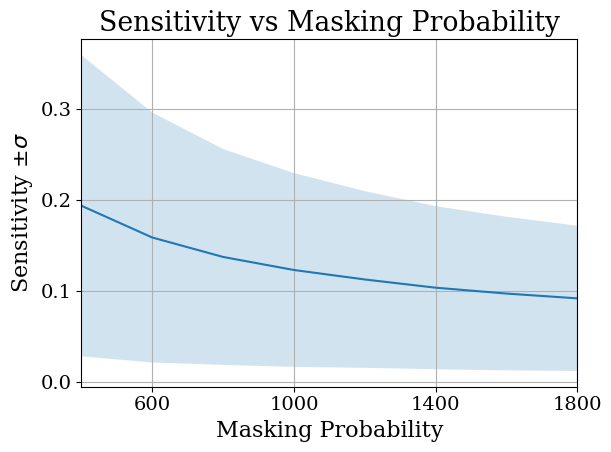

In [128]:
# from matplotlib.ticker import Fix

param = list(sensitivities.keys())
values = avg_sensitivities
err = err_sensitivities

param = np.array(param).astype(np.float32)
fig, ax = plt.subplots()

ax.set_xlim(min(param), max(param))
ax.fill_between(param,
                values - err, 
                values + err, 
                alpha=.2)
# ax.set_xticks(param, zorder=0, rotation=90)
ax.xaxis.set_minor_formatter(FormatStrFormatter('.2f'))
    
ax.set_xticks(param[1::2])
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.grid()

plt.xlabel('Masking Probability')
plt.ylabel(r'Sensitivity $\pm \sigma$')
plt.title('Sensitivity vs Masking Probability')
plt.plot(param, values)

plt.tight_layout()



/tmp/ipykernel_88189/1278679633.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)


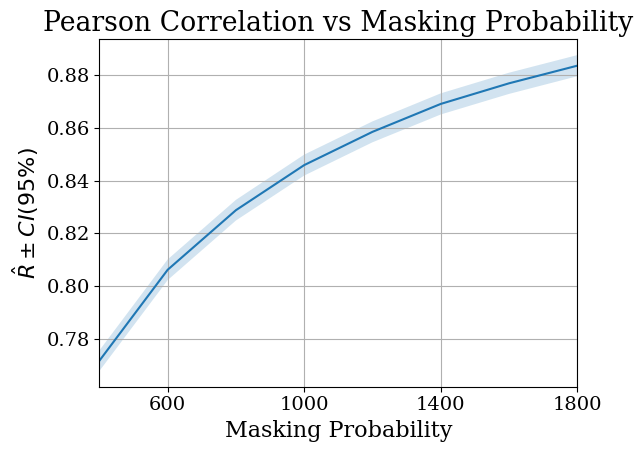

In [129]:
# from matplotlib.ticker import Fix

param = list(pearsons.keys())
values = avg_pearsons
err = err_pearsons

param = np.array(param).astype(np.float32)
fig, ax = plt.subplots()

ax.set_xlim(min(param), max(param))
ax.fill_between(param,
                values - err, 
                values + err, 
                alpha=.2)
# ax.set_xticks(param, zorder=0, rotation=90)
ax.xaxis.set_minor_formatter(FormatStrFormatter('.2f'))
    
ax.set_xticks(param[1::2])
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.grid()

plt.xlabel('Masking Probability')
plt.ylabel(r'$\hat{R} \pm CI(95\%) $')
plt.title('Pearson Correlation vs Masking Probability')
plt.plot(param, values)

plt.tight_layout()



/tmp/ipykernel_88189/3373470865.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)


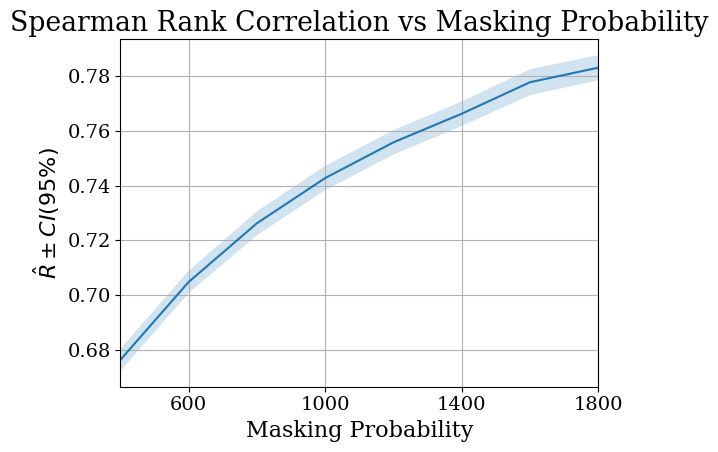

In [130]:
# from matplotlib.ticker import Fix

param = list(spearmans.keys())
values = avg_spearmans
err = err_spearmans

param = np.array(param).astype(np.float32)
fig, ax = plt.subplots()

ax.set_xlim(min(param), max(param))
ax.fill_between(param,
                values - err, 
                values + err, 
                alpha=.2)
# ax.set_xticks(param, zorder=0, rotation=90)
ax.xaxis.set_minor_formatter(FormatStrFormatter('.2f'))
    
ax.set_xticks(param[1::2])
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.grid()

plt.xlabel('Masking Probability')
plt.ylabel(r'$\hat{R} \pm CI(95\%) $')
plt.title('Spearman Rank Correlation vs Masking Probability')
plt.plot(param, values)

plt.tight_layout()



In [114]:
grouped = defaultdict(lambda: defaultdict(list))

for config in configs:
    p_keep = config['config']['p_keep']
    n_masks = config['config']['n_masks']
    grouped[np.float32(p_keep)][n_masks].append(config['single_deletion'])

In [115]:
grouped_errs = []
grouped_avgs = []
for p_keep in grouped.keys():
    grouped_avgs.append([])
    grouped_errs.append([])
    for n_masks in grouped[p_keep].keys():
        pear = grouped[p_keep][n_masks][0]['pearson']
        avg, err = aggregate_correlation(np.array(pear))
        grouped_avgs[-1].append(avg)
        grouped_errs[-1].append(err)

        

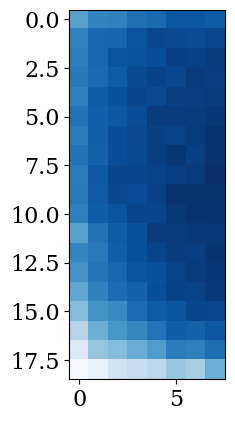

In [117]:
plt.imshow(grouped_avgs, cmap='Blues')